In [32]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import nan # importing nan to avoid overlapping in plotting datas
from datetime import datetime
from google.colab import drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# RUN LOCALLY
# path of our dataframe 
data_path =  "temperatura1_A.csv"

In [35]:
# RUN ON COLAB
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

# folder for the csv
subfolder = "Dati csv convalidati/"

# select the filename, make me dynamic
selected_dataset = "temperatura1_A.csv"

data_path = wk+subfolder+selected_dataset

In [36]:
# select the filename of the dataset (Dario: dont judge me)
selected_dataset = os.path.basename(data_path).split('_A')[0] 
if selected_dataset > "vel":
  dataset_sensor = "vento"
elif selected_dataset > "umidita":
  dataset_sensor = "umidità"
elif selected_dataset > "temperatura":    
  dataset_sensor = "temperatura"
elif selected_dataset > "radiazione":
  dataset_sensor = "radiazione"
elif selected_dataset > "pioggia":
  dataset_sensor = "pioggia"
elif selected_dataset > "direzione":
  dataset_sensor = "vento"
else:
  dataset_sensor = "Altezza neve"
print(dataset_sensor)

temperatura


In [37]:
# loading in pandas dataframe
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [38]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

In [39]:
df['datetime'] = pd.to_datetime(df['date']+" "+df['time'], format = '%d/%m/%Y %H:%M')

In [40]:
df #Printing table

,label,date,time,value,validation_code,datetime
0,T0009,01/01/2014,00:00,-2.1,1,2014-01-01 00:00:00
1,T0009,01/01/2014,00:15,-2.3,1,2014-01-01 00:15:00
2,T0009,01/01/2014,00:30,-2.2,1,2014-01-01 00:30:00
3,T0009,01/01/2014,00:45,-2.3,1,2014-01-01 00:45:00
4,T0009,01/01/2014,01:00,-2.5,1,2014-01-01 01:00:00
...,...,...,...,...,...,...
11763686,T0227,31/12/2021,22:45,8.1,1,2021-12-31 22:45:00
11763687,T0227,31/12/2021,23:00,8.2,1,2021-12-31 23:00:00
11763688,T0227,31/12/2021,23:15,8.1,1,2021-12-31 23:15:00
11763689,T0227,31/12/2021,23:30,8.0,1,2021-12-31 23:30:00


In [41]:
date_start = "29/08/2016" #@param {type:"string"}
date_end = "31/08/2016" #@param {type:"string"}
station_num = "T0059" #@param {type:"string"}

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

# Converting string in to datetime
date_start = datetime.strptime(date_start, '%d/%m/%Y')
date_end = datetime.strptime(date_end, '%d/%m/%Y')

df_filtered = df[(df['label'] == station_num) &
         (df['date'] >= date_start) & 
         (df['date'] <= date_end)]


# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
         (df['date'] >= date_start) & 
         (df['date'] <= date_end)]

df_filtered

,label,date,time,value,validation_code,datetime
2334648,T0059,2016-08-29,00:00,12.6,1,2016-08-29 00:00:00
2334649,T0059,2016-08-29,00:15,12.4,1,2016-08-29 00:15:00
2334650,T0059,2016-08-29,00:30,12.3,1,2016-08-29 00:30:00
2334651,T0059,2016-08-29,00:45,12.2,1,2016-08-29 00:45:00
2334652,T0059,2016-08-29,01:00,12.3,1,2016-08-29 01:00:00
...,...,...,...,...,...,...
2334931,T0059,2016-08-31,22:45,13.1,1,2016-08-31 22:45:00
2334932,T0059,2016-08-31,23:00,13.0,1,2016-08-31 23:00:00
2334933,T0059,2016-08-31,23:15,13.1,1,2016-08-31 23:15:00
2334934,T0059,2016-08-31,23:30,13.2,1,2016-08-31 23:30:00


In [42]:
# Split good and bad data into 2 samples 
y_signal = df_filtered.value
y_outliers = np.where(df_filtered["validation_code"] == 1, nan, df_filtered.value)

In [43]:
# Define the x axis value
x_range = range(len(df_filtered.time))
df_filtered["ax"] = df_filtered.datetime.astype(str)

for i in range(df_filtered.index[0], (df_filtered.index[0] + len(df_filtered.index))):
    df_filtered["ax"][i] = os.path.basename(df_filtered["ax"][i]).split('-')[2]
    
x_plot = np.array(df_filtered.ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


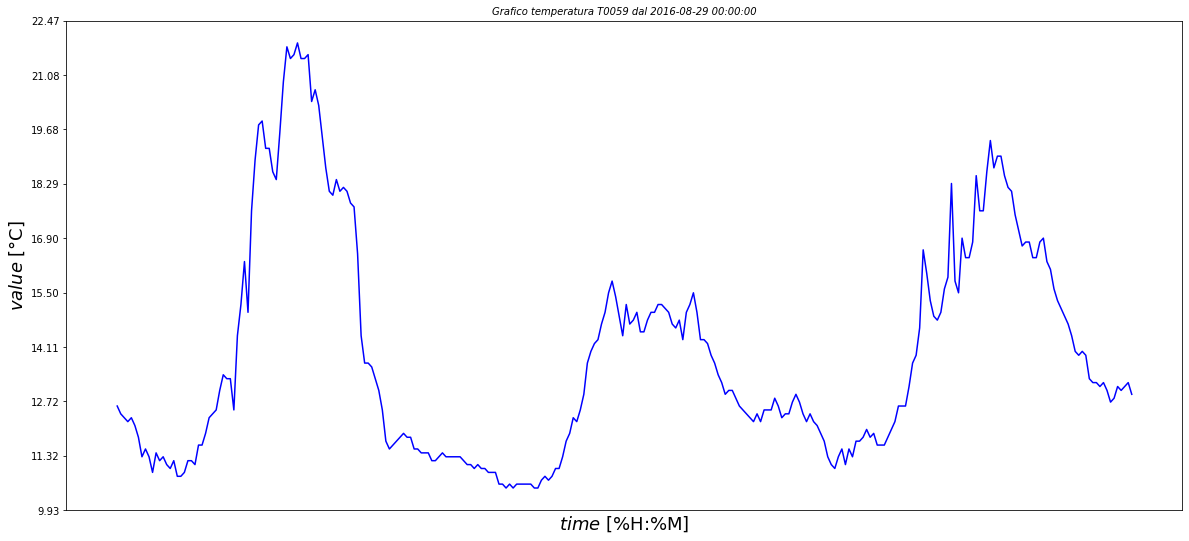

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Shapes sizes
figure_width = 20 #@param {type:"integer"}
figure_height = 10 #@param {type:"integer"}

# Setting font
font ="Verdana" #@param {type:"string"}
plt.rc(font)

# Styling text sizes
title_fontsize = 10 #@param {type:"integer"}
label_fontsize = 5 #@param {type:"integer"}
legend_size = 10 #@param {type:"integer"}
axis_fontsize = 18 #@param {type:"integer"}

# Set unit
x_unit = "%H:%M" #@param {type:"string"}
y_unit = "°C" #@param {type:"string"}

# Set tick 
n_yticks = 10 #@param {type:"integer"}
n_xinterval = 200  #@param {type:"integer"}

# Reshaping the plot
f = plt.figure()
f.set_figwidth(figure_width)
f.set_figheight(figure_height)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title('Grafico '+ dataset_sensor +' ' +station_num + ' dal ' + str(date_start) ,fontsize = title_fontsize, style = 'italic')
plt.xlabel('$\it{time}$' + ' [' + x_unit +']', fontsize = axis_fontsize) #se tutto in corsivo style = 'italic' 
plt.ylabel('$\it{value}$' + ' [' + y_unit +']', fontsize = axis_fontsize)
ax.set_xticks(range(len(x_plot)))

hours = mdates.HourLocator(interval = n_xinterval)
h_fmt = mdates.DateFormatter(x_unit)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

ax.yaxis.set_major_locator(ticker.LinearLocator(n_yticks))
f.autofmt_xdate()

# Plotting datas
plt.plot(x_plot, y_signal, "-",ms=8,color="blue")	
plt.plot(x_plot, y_outliers, "-",ms=8,mew=5,color="red")

# Making a legend
# ax.legend(['Good values', 'Bad values'], prop={'size': legend_size})

#Saving as PDF
my_file = selected_dataset + "_" + station_num + '.pdf'
savewk = '/content/drive/My Drive/10. Meteotrentino/ReportPlots'
plt.savefig(os.path.join(savewk, my_file), bbox_inches='tight')    

# Visualize
plt.show()
